# COVID19 - US - Stats

Ana Cláudia Ramos Martins Abreu A80276

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

Load map layer

In [3]:
path = "C:\\Users\\Claudia\\Desktop\\Trabalho SIG\\Mapa US2\\s_11au16.shp"
map_layer = QgsVectorLayer(path, 'USA map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


Load csv layer

In [5]:
csv_path = "file:///C:/OSGeo4W64/bin/QGIS/Projeto Covid-19/us_covid19.csv?delimiter=,'"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


JOIN map layer with csv layer

In [6]:
joinName = 'state'
targetName = 'STATE'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

## Charts related to COVID-19 data in the United States

In [51]:
dict = []

for feature in map_layer.getFeatures():
    if feature['STATE']:
        state = feature['STATE']
       
        if feature['Data_positive']:
            confirmed = feature['Data_positive']
        else:
            confirmed = 0
        if feature['Data_death']:
            death = feature['Data_death']
        else:
            death = 0
        if feature['Data_recovered']:
            recovered = feature['Data_recovered']
        else:
            recovered = 0
        if feature['Data_negative']:
            negative = feature['Data_negative']
        else:
            negative = 0
        if feature['Data_date']:
            date = feature['Data_date']
        else:
            date = 0
        if feature['Data_posNeg']:
            posNeg = feature['Data_posNeg']
        else:
            posNeg = 0
    e = {'Name': state, 'Confirmed': confirmed, 'Death': death, 'Recovered': recovered, 'Negative': negative, 'Date': date, 'False Positive': posNeg }
    dict.append(e)

In [52]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)
n = sorted(dict, key = lambda i: i['Negative'],reverse=True)
dat = sorted(dict, key = lambda i: i['Date'],reverse=True)
p = sorted(dict, key = lambda i: i['False Positive'],reverse=True)

top5confirmed = c[0:5]
top5death = d[0:5]
top5recovered = r[0:5]
top5negative = n[0:5]
date=dat[0:10]
top10confirmed=c[0:10]
top5falsepositive= p[0:5]

bottom5confirmed = c[size:]
bottom5death = d[size:]


### Top 5 Confirmed Cases

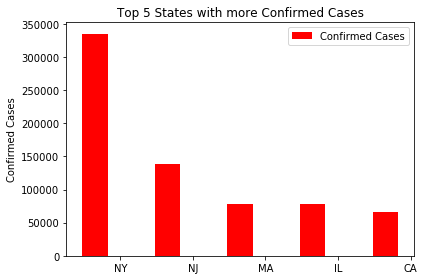

In [36]:
delta1 = [top5confirmed[0]['Confirmed'],top5confirmed[1]['Confirmed'],top5confirmed[2]['Confirmed'],top5confirmed[3]['Confirmed'],top5confirmed[4]['Confirmed']]
states = [top5confirmed[0]['Name'],top5confirmed[1]['Name'],top5confirmed[2]['Name'],top5confirmed[3]['Name'],top5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Confirmed Cases', color=['red'])

plt.ylabel('Confirmed Cases')
plt.title('Top 5 States with more Confirmed Cases')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Bottom 5 Confirmed Cases

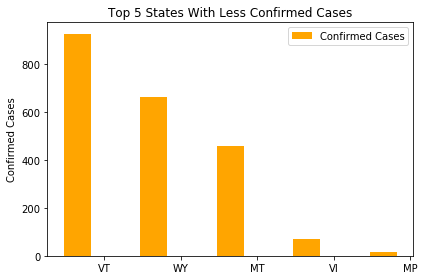

In [38]:
delta1 = [bottom5confirmed[0]['Confirmed'],bottom5confirmed[1]['Confirmed'],bottom5confirmed[2]['Confirmed'],bottom5confirmed[3]['Confirmed'],bottom5confirmed[4]['Confirmed']]
states = [bottom5confirmed[0]['Name'],bottom5confirmed[1]['Name'],bottom5confirmed[2]['Name'],bottom5confirmed[3]['Name'],bottom5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Confirmed Cases', color=['orange'])

plt.ylabel('Confirmed Cases')
plt.title('Top 5 States With Less Confirmed Cases')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Top 5 Deaths

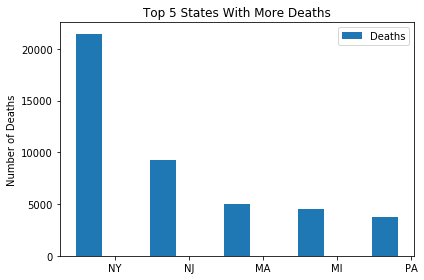

In [39]:
delta1 = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
states = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths')

plt.ylabel('Number of Deaths')
plt.title('Top 5 States With More Deaths')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Bottom 5 Deaths

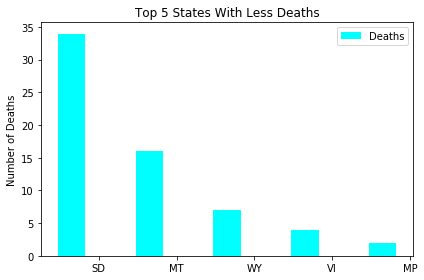

In [40]:
delta1 = [bottom5death[0]['Death'],bottom5death[1]['Death'],bottom5death[2]['Death'],bottom5death[3]['Death'],bottom5death[4]['Death']]
states = [bottom5death[0]['Name'],bottom5death[1]['Name'],bottom5death[2]['Name'],bottom5death[3]['Name'],bottom5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths', color=['cyan'])

plt.ylabel('Number of Deaths')
plt.title('Top 5 States With Less Deaths')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Top 5 Recovered Cases

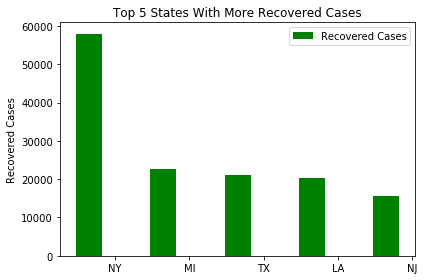

In [41]:
delta1 = [top5recovered[0]['Recovered'],top5recovered[1]['Recovered'],top5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [top5recovered[0]['Name'],top5recovered[1]['Name'],top5recovered[2]['Name'],top5recovered[3]['Name'],top5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered Cases', color=['green'])

plt.ylabel('Recovered Cases')
plt.title('Top 5 States With More Recovered Cases')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Top 5 Negative Tests 

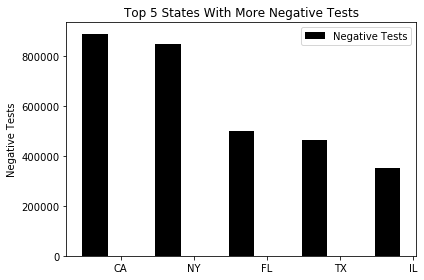

In [54]:
delta1 = [top5negative[0]['Negative'],top5negative[1]['Negative'],top5negative[2]['Negative'],top5negative[3]['Negative'],top5negative[4]['Negative']]
states = [top5negative[0]['Name'],top5negative[1]['Name'],top5negative[2]['Name'],top5negative[3]['Name'],top5negative[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Negative Tests', color=['black'])

plt.ylabel('Negative Tests')
plt.title('Top 5 States With More Negative Tests')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Bar chart comparing data between NY and NJ

As we can see from the previous graphs, the states of NY (New York) and NJ (New Jersey) are the most affected by the pandemic. So, next there is a graph that allows the comparison of data between these two states.

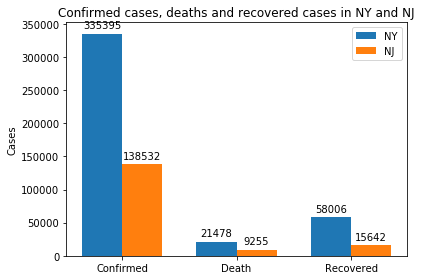

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Confirmed', 'Death', 'Recovered']
NY_means = []
NJ_means = []

for feature in map_layer.getFeatures():
    if feature['STATE']=="NY":
        NY_means.append(feature['Data_positive'])
        NY_means.append(feature['Data_death'])
        NY_means.append(feature['Data_recovered'])

for feature in map_layer.getFeatures():
    if feature['STATE']=="NJ":
        NJ_means.append(feature['Data_positive'])
        NJ_means.append(feature['Data_death'])
        NJ_means.append(feature['Data_recovered'])
        
        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NY_means, width, label='NY')
rects2 = ax.bar(x + width/2, NJ_means, width, label='NJ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Confirmed cases, deaths and recovered cases in NY and NJ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Top 5 False Positive Tests 

A false positive result may require further testing. It is important to prevent this from happening, as such tests are unnecessary and can be used for someone who really needs them. Thus, it is important to detect which states have the highest number of false positives, in order to know where more action should be taken to reduce this problem.

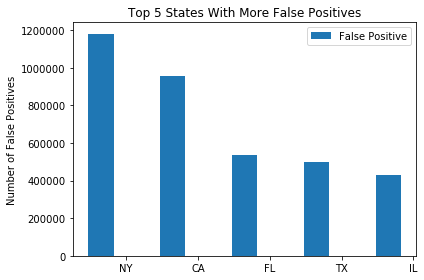

In [53]:
delta1 = [top5falsepositive[0]['False Positive'],top5falsepositive[1]['False Positive'],top5falsepositive[2]['False Positive'],top5falsepositive[3]['False Positive'],top5falsepositive[4]['False Positive']]
states = [top5falsepositive[0]['Name'],top5falsepositive[1]['Name'],top5falsepositive[2]['Name'],top5falsepositive[3]['Name'],top5falsepositive[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='False Positive')

plt.ylabel('Number of False Positives')
plt.title('Top 5 States With More False Positives')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Hospitalized cases

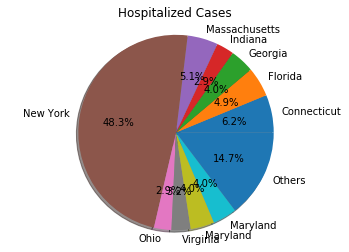

In [44]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_hospitalized']:
        total += feature['Data_hospitalized']

for feature in map_layer.getFeatures():
    if feature['Data_hospitalized']:
        if (feature['Data_hospitalized']/total) > 0.025:
            values.append(feature['Data_hospitalized'])
            labels.append(feature['NAME'])
        else:
            lowerTotal += feature['Data_hospitalized']

values.append(lowerTotal)
labels.append("Others")

plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Hospitalized Cases')
plt.axis('equal')
plt.show()

### Currently ventilated patients

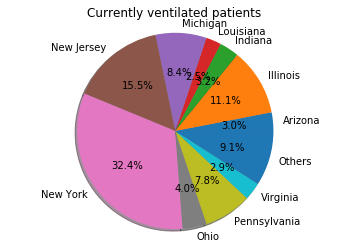

In [45]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_onVentilatorCurrently']:
        total += feature['Data_onVentilatorCurrently']

for feature in map_layer.getFeatures():
    if feature['Data_onVentilatorCurrently']:
        if (feature['Data_onVentilatorCurrently']/total) > 0.025:
            values.append(feature['Data_onVentilatorCurrently'])
            labels.append(feature['NAME'])
        else:
            lowerTotal += feature['Data_onVentilatorCurrently']

values.append(lowerTotal)
labels.append("Others")

plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Currently ventilated patients')
plt.axis('equal')
plt.show()

### Number of cases in NY over the days

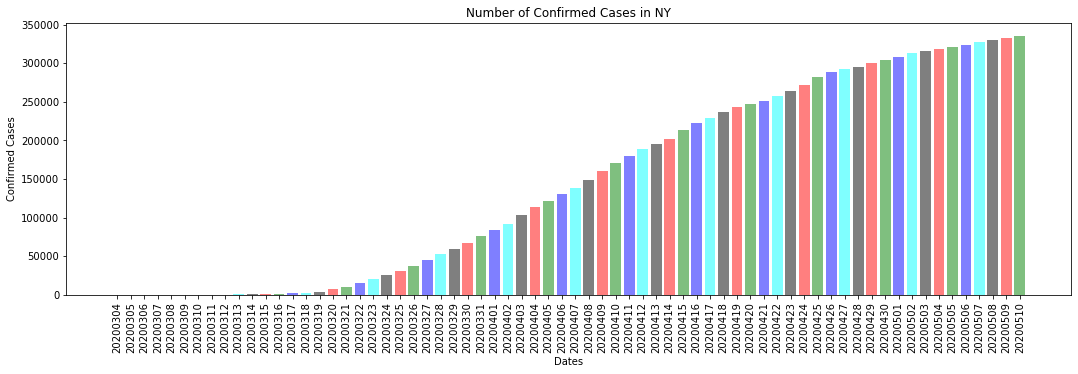

In [46]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['state']=="NY":
        values.append(feature['positive'])
        labels.append(feature['date'])

fig, ax = plt.subplots(figsize=(18,5))        
y_pos = np.arange(len(labels))

plt.bar(y_pos, values, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, labels, rotation='vertical')
plt.ylabel('Confirmed Cases')
plt.xlabel('Dates')
plt.title('Number of Confirmed Cases in NY')

plt.show()


### Number of recovered cases in NY over the days

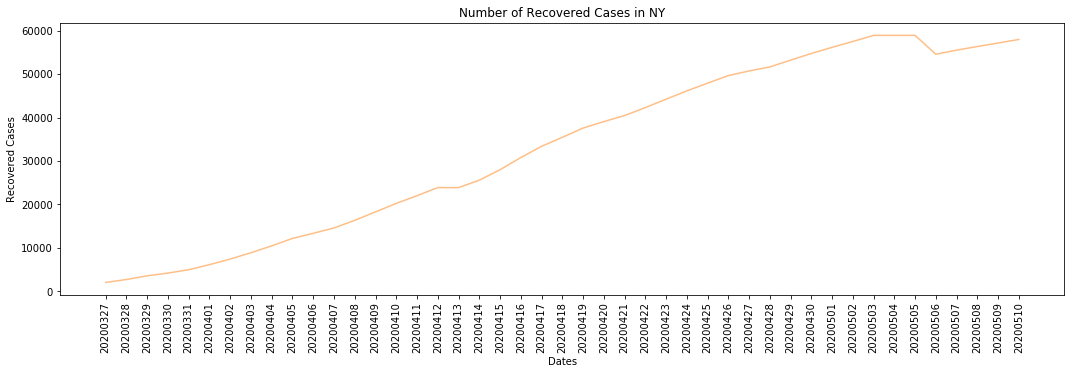

In [47]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['state']=="NY":
        if feature['recovered']>0:
            values.append(feature['recovered'])
            labels.append(feature['date'])

fig, ax = plt.subplots(figsize=(18,5))  
y_pos = np.arange(len(labels))

plt.plot(y_pos, values, alpha=0.5, color='C11')
plt.xticks(y_pos, labels, rotation='vertical')
plt.ylabel('Recovered Cases')
plt.xlabel('Dates')
plt.title('Number of Recovered Cases in NY')

plt.show()

### Number of deaths in NY over the days

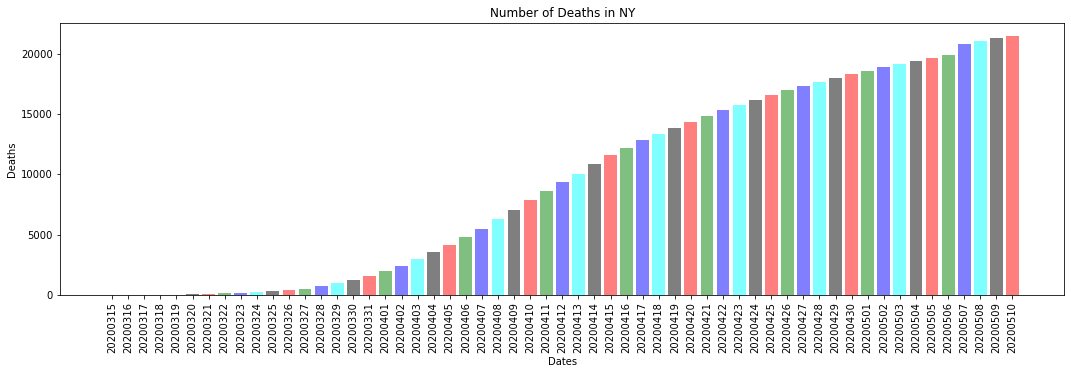

In [48]:
values = []
labels = []
datas = []
lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['state']=="NY":
        if feature['death']>0:
            values.append(feature['death'])
            labels.append(feature['date'])

fig, ax = plt.subplots(figsize=(18,5))  
y_pos = np.arange(len(labels))

plt.bar(y_pos, values, align='center', alpha=0.5, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, labels, rotation='vertical')
plt.ylabel('Deaths')
plt.xlabel('Dates')
plt.title('Number of Deaths in NY')

plt.show()

### Graph showing confirmed cases in each state

In [22]:
df = pd.read_csv(open('C:\\OSGeo4W64\\bin\\QGIS\\Projeto Covid-19\\us_covid19.csv'))
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200122,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,NaN,NaN,NaN,NaN,NaN
1,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
2,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
4,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0


In [23]:
data = df.groupby(['state']).sum().reset_index()
data.set_index("state", inplace=True)

In [24]:
length = len(data.columns.tolist())
positive_increase = data.columns.tolist()[-2]

sumdata = data[positive_increase]
sumdata = sumdata.sort_values(ascending=True)

sumdata

state
AS         0.0
MP        16.0
VI        68.0
GU       148.0
AK       379.0
MT       458.0
HI       630.0
WY       661.0
VT       927.0
WV      1360.0
ME      1436.0
ND      1491.0
PR      2193.0
ID      2230.0
NH      3009.0
OR      3225.0
SD      3517.0
AR      3747.0
OK      4588.0
NM      4778.0
NV      6097.0
UT      6250.0
DC      6272.0
KY      6440.0
DE      6447.0
KS      6948.0
SC      7653.0
NE      8234.0
MS      9501.0
AL      9777.0
MO      9844.0
WI     10218.0
AZ     11117.0
MN     11271.0
RI     11273.0
IA     11959.0
NC     14763.0
TN     14984.0
WA     16673.0
CO     19375.0
OH     24081.0
VA     24081.0
IN     24125.0
LA     31600.0
MD     32587.0
GA     33439.0
CT     33554.0
TX     38868.0
FL     40594.0
MI     47129.0
PA     56609.0
CA     66627.0
IL     77737.0
MA     77785.0
NJ    138531.0
NY    335389.0
Name: positiveIncrease, dtype: float64

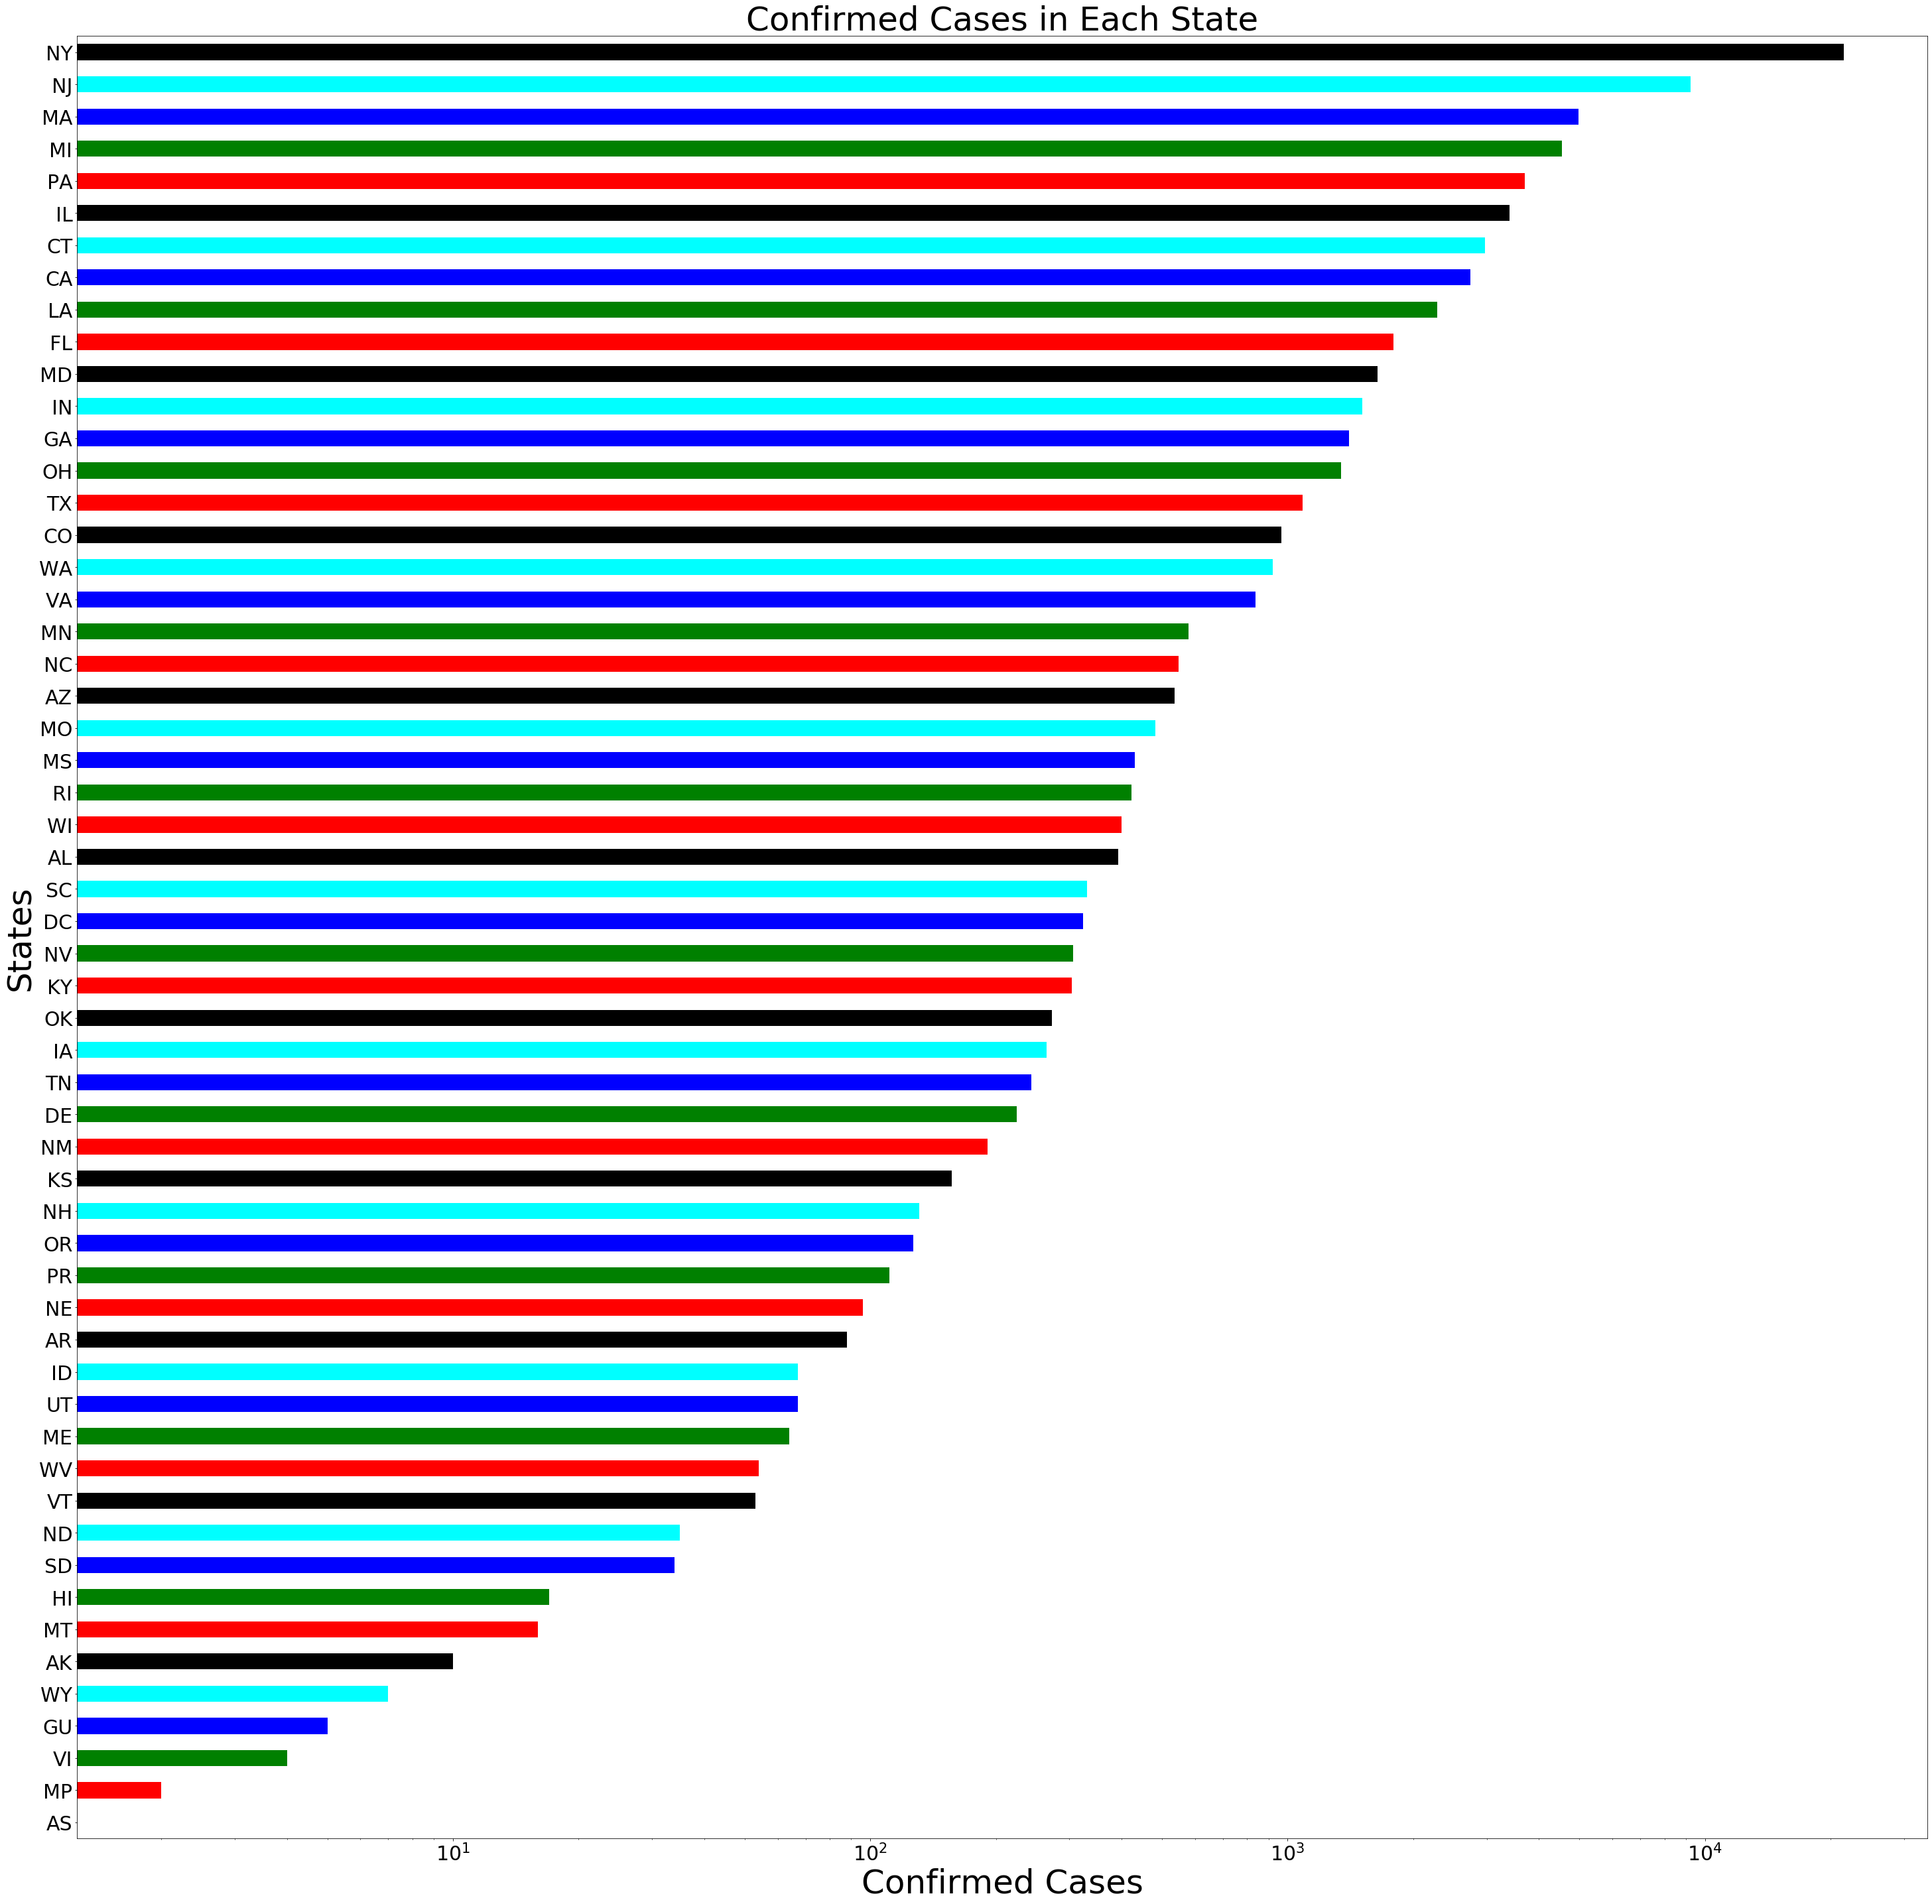

In [49]:
sumdata.plot.barh(figsize=(50,50),fontsize=30, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xscale("log")
plt.ylabel('States', fontsize=50)
plt.xlabel('Confirmed Cases', fontsize=50)
plt.title('Confirmed Cases in Each State', fontsize=50)
plt.show()

### Graph showing deaths in each state

In [26]:
length = len(data.columns.tolist())
death_increase = data.columns.tolist()[17]

sumdata = data[death_increase]
sumdata = sumdata.sort_values(ascending=True)

sumdata

state
AS        0.0
MP        2.0
VI        4.0
GU        5.0
WY        7.0
AK       10.0
MT       16.0
HI       17.0
SD       34.0
ND       35.0
VT       53.0
WV       54.0
ME       64.0
UT       67.0
ID       67.0
AR       88.0
NE       96.0
PR      111.0
OR      127.0
NH      131.0
KS      157.0
NM      191.0
DE      224.0
TN      243.0
IA      265.0
OK      272.0
KY      304.0
NV      306.0
DC      323.0
SC      331.0
AL      393.0
WI      400.0
RI      422.0
MS      430.0
MO      482.0
AZ      536.0
NC      547.0
MN      578.0
VA      839.0
WA      921.0
CO      967.0
TX     1088.0
OH     1341.0
GA     1405.0
IN     1508.0
MD     1644.0
FL     1791.0
LA     2286.0
CA     2745.0
CT     2967.0
IL     3406.0
PA     3707.0
MI     4551.0
MA     4979.0
NJ     9255.0
NY    21478.0
Name: deathIncrease, dtype: float64

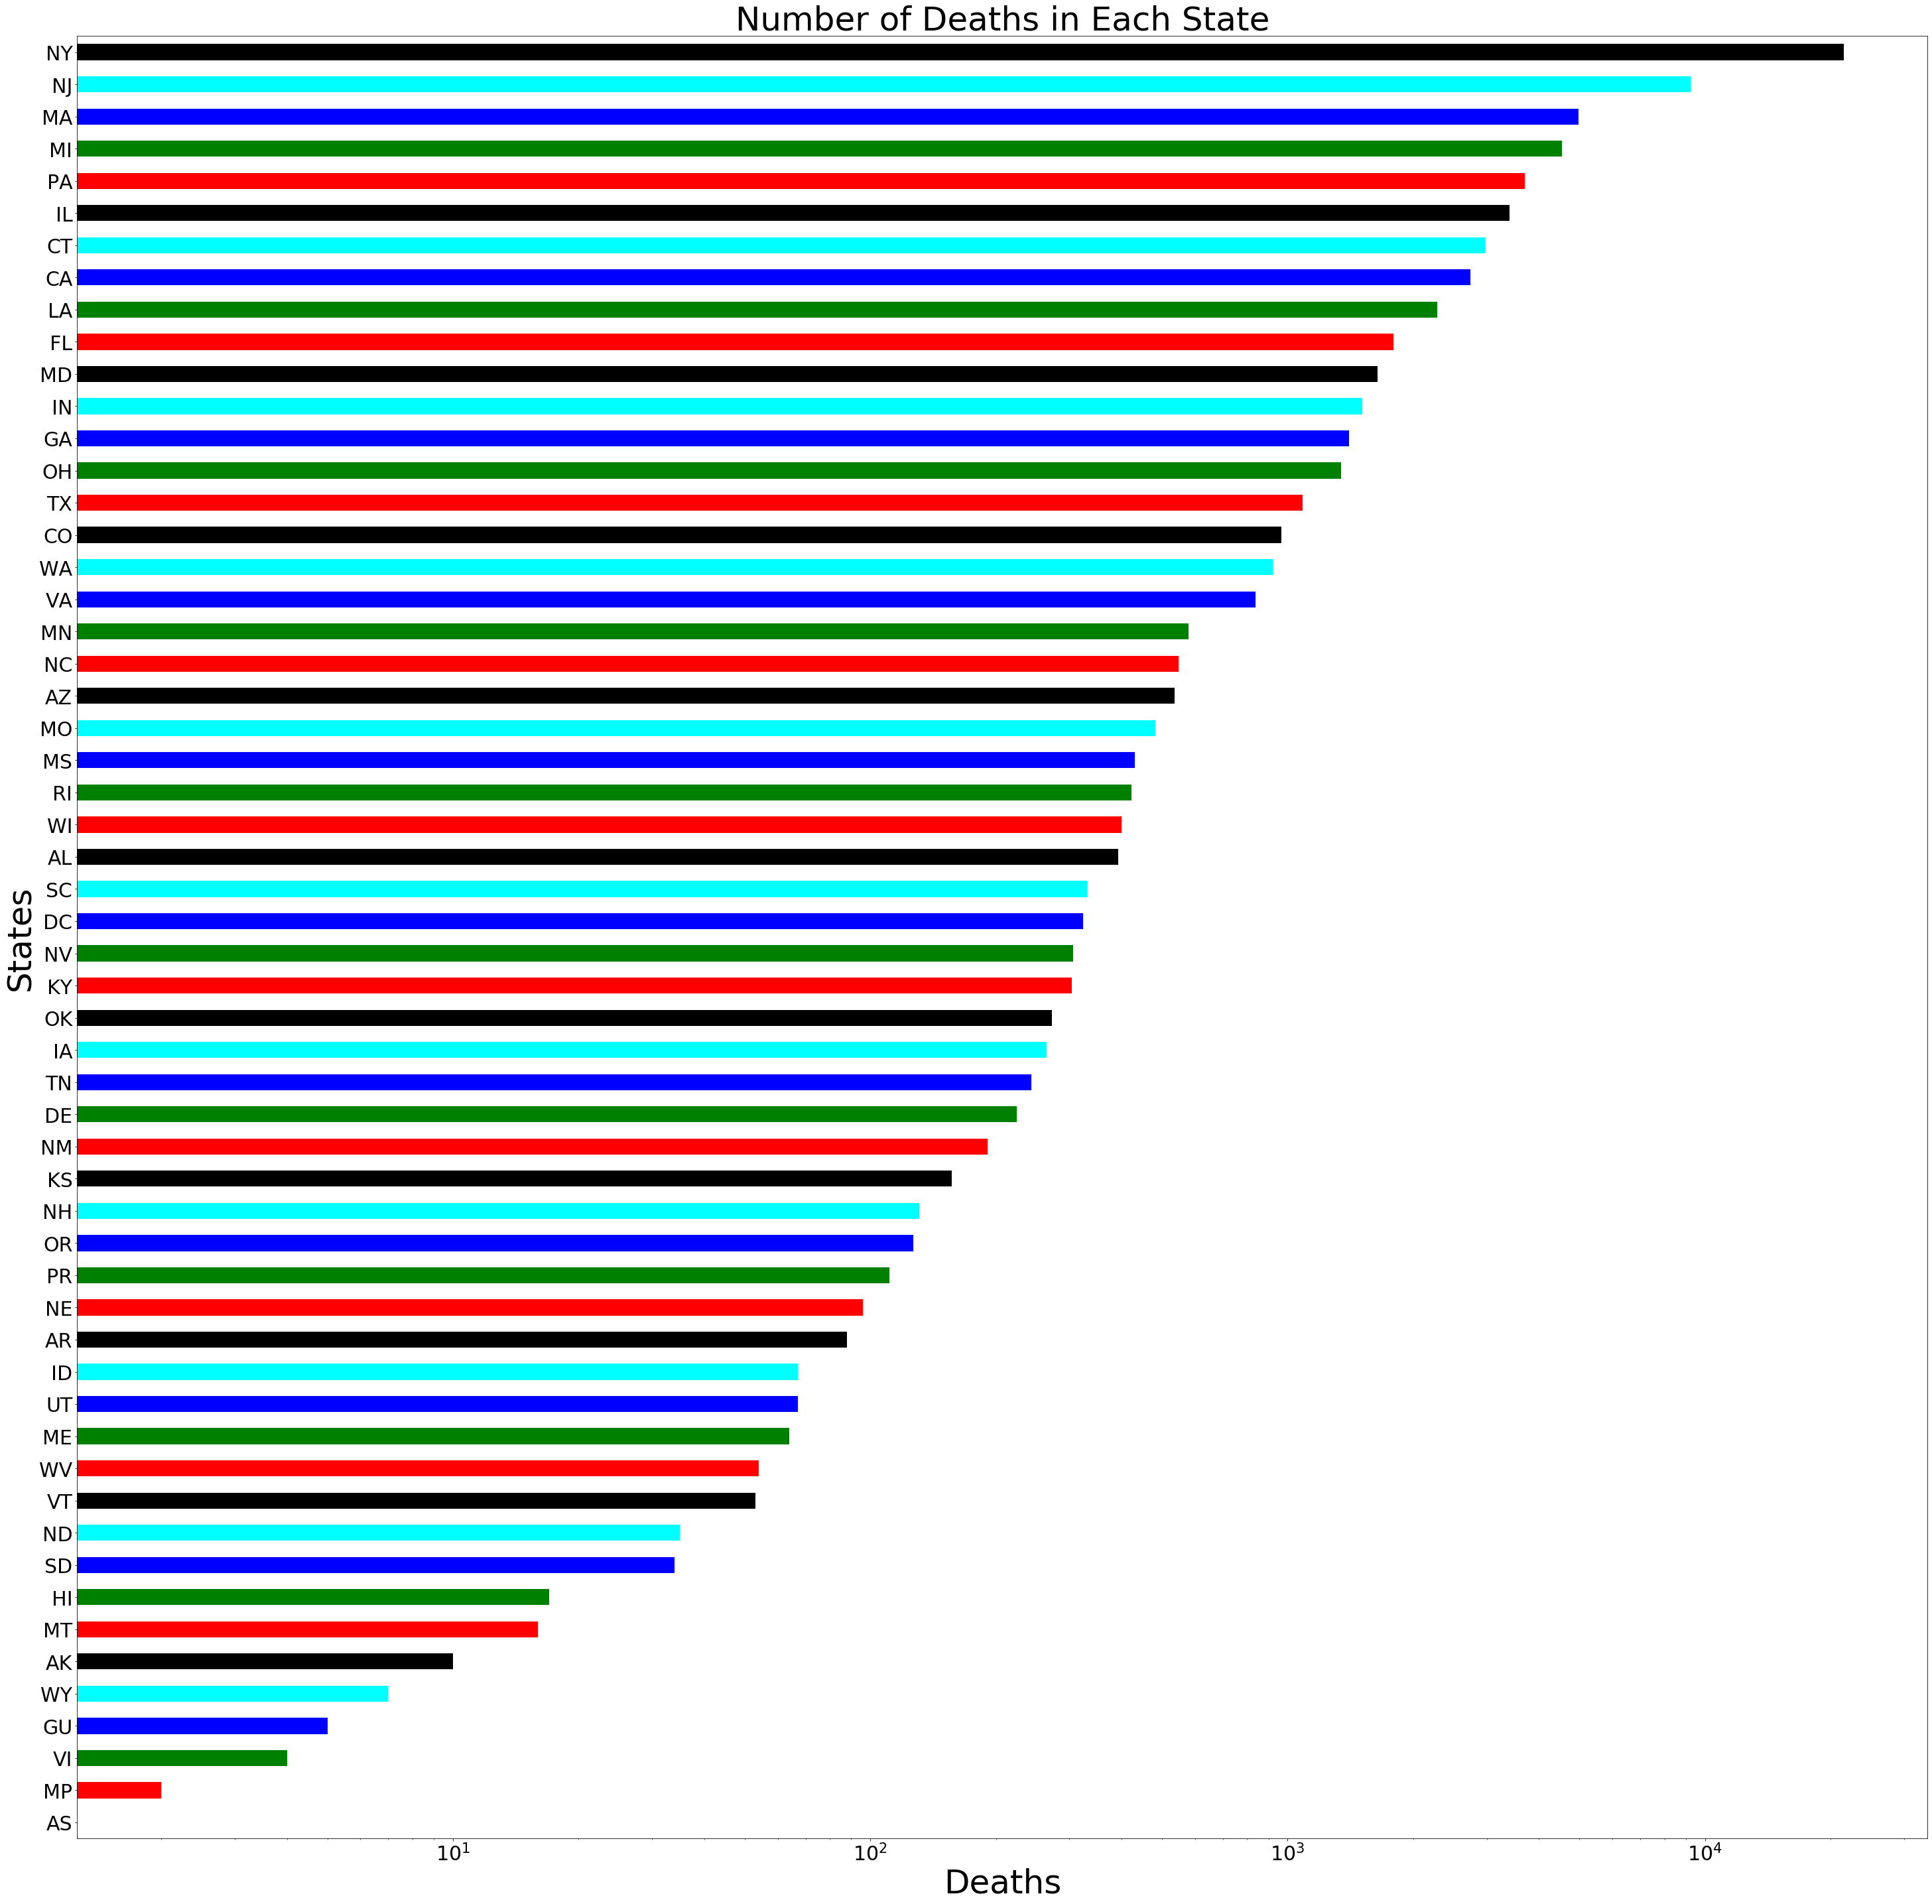

In [50]:
sumdata.plot.barh(figsize=(50,50),fontsize=30, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xscale("log")
plt.ylabel('States', fontsize=50)
plt.xlabel('Deaths', fontsize=50)
plt.title('Number of Deaths in Each State', fontsize=50)
plt.show()

### Animated graph of the number of confirmed cases in each state, over time

AINDA NÃO ESTÁ FEITO

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def draw_barchart(col):
    dff = data.iloc[:,col].sort_values(ascending=True).tail(10)
    ax.clear()
    ax.barh(dff.index, dff.values)
    dx = dff.values.max() / 200
    for i, (value, name) in enumerate(zip(dff.values, dff.index)):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, list(data.columns)[col], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID cases by country since 22/1/2020',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)